<a href="https://colab.research.google.com/github/chihoang/Springboard_mec-mini-projects/blob/main/Mini_Project_Data_Wrangling_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
pd.__version__

'1.3.5'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [ ]:
### 11/18/22: mount to the datasets in Google Drive ###
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'myfolder')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
# movies = pd.read_csv('titles.csv')
movies = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/\
mec-mini-projects-master/mec-5.3.10-data-wranging-with-pandas-mini-project/titles.csv')


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [ ]:
# cast = pd.read_csv('cast.csv.zip')
cast = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/\
mec-mini-projects-master/mec-5.3.10-data-wranging-with-pandas-mini-project/cast.csv.zip')


In [ ]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [ ]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [ ]:
# release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/\
mec-mini-projects-master/mec-5.3.10-data-wranging-with-pandas-mini-project/release_dates.csv', \
parse_dates=['date'], infer_datetime_format=True)


In [ ]:
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [ ]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [ ]:
len(movies)

244914

### List all Batman movies ever made

In [ ]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [ ]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [ ]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(hp_df))
# print( hp_df.head(10) )
hp_df.sort_values(by=['year'], ascending=False)

Total Harry Potter Movies: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [ ]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [ ]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [ ]:
movies0018_df = movies[ (movies.year >= 2000) & (movies.year <= 2018) ]
print(len(movies0018_df))
print(movies0018_df)

114070
                                               title  year
0                             The Ticket to the Life  2009
1       Parallel Worlds: A New Rock Music Experience  2016
2                          Morita - La hija de Jesus  2008
3                                                Gun  2017
4                             Love or Nothing at All  2014
...                                              ...   ...
244899                       Poppy Goes to Hollywood  2016
244901                                 Thomson Villa  2014
244903                                A Mero Hajur 2  2017
244906                Yin yang lu shi: Xuan yan zhou  2001
244908                                Tommy's Honour  2016

[114070 rows x 2 columns]


### Section I - Q4: How many movies are titled "Hamlet"?

In [ ]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False) ] 
print( len(hamlet_df) )
print(hamlet_df.head())

57
                title  year
1931           Hamlet  2009
8214           Hamlet  1976
10364   Hamlet A.D.D.  2014
17531  Hamlet's Ghost  2015
17833   Zombie Hamlet  2012


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [ ]:
hamlet_df[hamlet_df.year>=2000].sort_values(by=['year'], ascending=True)


,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [ ]:
print( cast.head() )
print(cast.info())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB
None


In [ ]:
# hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
inception_df = cast[cast.title.str.contains('Inception', case=False)]
print(inception_df.info())
print(inception_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 58474 to 3731263
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      87 non-null     object 
 1   year       87 non-null     int64  
 2   name       87 non-null     object 
 3   type       87 non-null     object 
 4   character  87 non-null     object 
 5   n          51 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None
                                                    title  year  \
58474   Fraud in the Inception: Who killed Robert Haml...  2013   
98153                                           Inception  2010   
149008                                          Inception  2010   
183937                                          Inception  2010   
197877                                          Inception  2010   

                        name   type              character     n  
58474           Sky Anderson  ac

In [ ]:
inception_df.isnull().sum().sort_values(ascending=False).head()

n        36
title     0
year      0
name      0
type      0
dtype: int64

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [ ]:
print( len(inception_df[inception_df.n>=0]) )
# print( inception_df[inception_df.n>=0] )

51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [ ]:
inception_df[inception_df.n>=0].sort_values(by=['n'], ascending=True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9: Albus Dumbledore

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [ ]:
## (A) 
ad_df = cast[cast.character.str.contains('Albus Dumbledore', case=False)]
print(ad_df.info())
print(ad_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 704984 to 2248085
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      12 non-null     object 
 1   year       12 non-null     int64  
 2   name       12 non-null     object 
 3   type       12 non-null     object 
 4   character  12 non-null     object 
 5   n          9 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 672.0+ bytes
None
                                                title  year  \
704984                                     Epic Movie  2007   
792419   Harry Potter and the Deathly Hallows: Part 1  2010   
792420   Harry Potter and the Deathly Hallows: Part 2  2011   
792421            Harry Potter and the Goblet of Fire  2005   
792422         Harry Potter and the Half-Blood Prince  2009   
792423      Harry Potter and the Order of the Phoenix  2007   
792424       Harry Potter and the Prisoner of Azkaban  

In [ ]:
## (B) show only the actors who played the character 'Albus Dumbledore'
print( len(ad_df['name'].unique()) )
print( ad_df['name'].unique() )

6
['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Toby Regbo' 'Timothy Tedmanson']


### Section I - Q10: Keanu Reeves

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [ ]:
# (A) How many roles has 'Keanu Reeves' played throughout his career?
kr_df = cast[cast.name.str.contains('Keanu Reeves', case=False)]

In [ ]:
print( len(kr_df) )
print( kr_df.info() )
print( kr_df.head() )
# print( kr_df.tail() )

62
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1892342 to 1892403
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      62 non-null     object 
 1   year       62 non-null     int64  
 2   name       62 non-null     object 
 3   type       62 non-null     object 
 4   character  62 non-null     object 
 5   n          58 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ KB
None
                                    title  year          name   type  \
1892342                          47 Ronin  2013  Keanu Reeves  actor   
1892343                  A Scanner Darkly  2006  Keanu Reeves  actor   
1892344              A Walk in the Clouds  1995  Keanu Reeves  actor   
1892345        Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
1892346  Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   

           character    n  
1892342          Kai  1.0  
1892343 

In [ ]:
# (B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.
kr_df[(kr_df.n>=0) & (kr_df.year>=1999)].sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: total number of actor and actress roles

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [ ]:
## (A) List the total number of actor and actress roles available from 1950 - 1960
tmp1 = cast[(cast['type'].str.contains('actor', case=False)) | \
            (cast['type'].str.contains('actress', case=False)) ] 

tmp2 = tmp1[(tmp1.year>=1950) & (tmp1.year<=1960) ]
print(tmp2)

                         title  year                      name     type  \
66             Fire Down Below  1957      'Stretch' Cox Troupe    actor   
67                De zaak M.P.  1960             Frans 't Hoen    actor   
68          Dorp aan de rivier  1958             Frans 't Hoen    actor   
111       Ci sposeremo a Capri  1956             Quartetto 2+2    actor   
116        Thunder in Carolina  1960  2nd Marine Division Band    actor   
...                        ...   ...                       ...      ...   
3786059       Styrmand Karlsen  1958                Clara ?st?  actress   
3786061  Tre piger fra Jylland  1957                Clara ?st?  actress   
3786075                   Toya  1956                Aslaug ?ye  actress   
3786083                 Venner  1960              Bibba ?ygard  actress   
3786094     Akdeniz korsanlari  1950           Muazzez ?lkerer  actress   

                character     n  
66         Limbo Dance by  20.0  
67         Hollandse boer  29.0

In [ ]:
## (B) List the total number of actor and actress roles available from 2007 - 2017
tmp1 = cast[(cast['type'].str.contains('actor', case=False)) | \
            (cast['type'].str.contains('actress', case=False)) ] 

tmp2 = tmp1[(tmp1.year>=2007) & (tmp1.year<=2017) ]
print(tmp2)

                          title  year                         name     type  \
0                Closet Monster  2015                     Buffy #1    actor   
2           Battle of the Sexes  2017                      $hutter    actor   
3          Secret in Their Eyes  2015                      $hutter    actor   
4                    Steve Jobs  2015                      $hutter    actor   
5        Straight Outta Compton  2015                      $hutter    actor   
...                         ...   ...                          ...      ...   
3786159                Eldfjall  2011      Katla M. ?orgeirsd?ttir  actress   
3786160               Svanurinn  2017      Katla M. ?orgeirsd?ttir  actress   
3786166               Foreldrar  2007  Lilja Gu?r?n ?orvaldsd?ttir  actress   
3786167                 Rokland  2011  Lilja Gu?r?n ?orvaldsd?ttir  actress   
3786168                      XL  2013  Lilja Gu?r?n ?orvaldsd?ttir  actress   

                          character     n  
0      

### Section I - Q12: total number of leading roles

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [ ]:
## (A) List the total number of leading roles available from 2000 to present
# len( cast[(cast.n>=0) & (cast.year>=2000)] )
cast[(cast.n>=0) & (cast.year>=2000)]

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
...,...,...,...,...,...,...
3786163,Beowulf & Grendel,2005,Steinunn ?l?na ?orsteinsd?ttir,actress,Wealtheow,15.0
3786164,Eden,2018,Steinunn ?l?na ?orsteinsd?ttir,actress,M??ir Viggu,8.0
3786169,Niceland (Population. 1.000.002),2004,Steinunn ?orvaldsd?ttir,actress,Factory Worker,21.0
3786172,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0


In [ ]:
## (B) List the total number of non-leading roles available from 2000 - present (exclude support cast)
# len( cast[(cast.n=='NaN') & (cast.year>=2000) ]  )
cast[(cast.year>=2000) & ~(cast.n>=0)]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
...,...,...,...,...,...,...
3786159,Eldfjall,2011,Katla M. ?orgeirsd?ttir,actress,Home Nurse,NaN
3786160,Svanurinn,2017,Katla M. ?orgeirsd?ttir,actress,?l?f,NaN
3786166,Foreldrar,2007,Lilja Gu?r?n ?orvaldsd?ttir,actress,Katrin Eldri,NaN
3786167,Rokland,2011,Lilja Gu?r?n ?orvaldsd?ttir,actress,A?albj?rg - Dagga's Mother,NaN


In [ ]:
## (C) List the total number of support\extra-credit roles available from 2000 - present
cast[cast.year>=2000].isnull().sum()

title             0
year              0
name              0
type              0
character         0
n            887484
dtype: int64

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [ ]:
top_ten = movies.title.value_counts()[:10]
print( top_ten )
print( type(top_ten) )

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64
<class 'pandas.core.series.Series'>


### Plot the top ten common movie names of all time

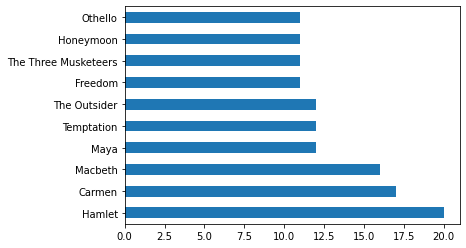

In [ ]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [ ]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [ ]:
most_release = release_dates.year.value_counts()[:3]
print(most_release)

2016    17548
2014    17519
2015    16639
Name: year, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [ ]:
# df.groupby((df.index.year//10)*10).sum()
release_decade = release_dates.groupby( (release_dates.year//10)*10 ).sum()
release_decade.rename(columns={'year': 'movies'}, inplace=True)
print(release_decade)

         movies
year           
1890       1894
1900      26708
1910   12416090
1920   26333251
1930   46364648
1940   46258251
1950   62430579
1960   63990500
1970   63529195
1980   71920525
1990  103483190
2000  204608300
2010  250937407
2020     212142
2110       2115


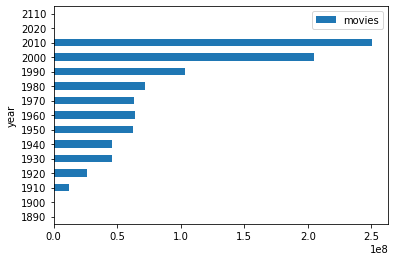

In [ ]:
release_decade.plot(kind='barh')

### Section II - Q3: top 10 people

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [ ]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [ ]:
## (A) What are the top 10 most common character names in movie history?
cast.character.value_counts().iloc[:10]
# cast.character.sort_values().iloc[:10]


Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [ ]:
## (B) Who are the top 10 people most often credited as "Herself" in movie history?
herself = cast[cast.character.str.contains('Herself', case=False)]
print(herself)

                                   title  year                   name  \
119017                Alexander Jamieson  2017             Etta Baker   
199920               Le fils de Gascogne  1995            Ren? Biaggi   
212911              Forty Shades of Blue  2005           J. Blackfoot   
213254                Wienfilm 1896-1976  1976        Moucle Blackout   
231656               Not Another B Movie  2010      Babette Bombshell   
...                                  ...   ...                    ...   
3784856                 Vivir en Sevilla  1978   Beatriz (VI) ?lvarez   
3784975           Torres Quevedo: Vol. 2  2016  Patricia (XI) ?lvarez   
3784991                  Bendito Canalla  2008       Serafina ?lvarez   
3785503  Nora-neko rokku: Mashin animaru  1970             Tomoko ?ta   
3786139            6th NAFCA Annual Show  2017           Preity ?pala   

            type            character      n  
119017     actor              Herself    NaN  
199920     actor             

In [ ]:
herself.name.value_counts().iloc[:10]

Queen Elizabeth II                  18
Jacqueline Kennedy                  12
Margaret Thatcher                   10
Joyce Brothers                      10
Hillary Clinton                      9
Mar?a Luisa (V) Mart?n               9
Luisa Horga                          9
Pat Nixon                            8
Caroline Kennedy                     7
Queen Elizabeth the Queen Mother     7
Name: name, dtype: int64

In [ ]:
## (C) Who are the top 10 people most often credited as "Himself" in movie history?
himself = cast[cast.character.str.contains('Himself', case=False)]
print(himself)

                                                     title  year  \
35                Been Down So Long It Looks Like Up to Me  1971   
36                                  I Wanna Hold Your Hand  1978   
55                                              Whitefolks  2017   
96                                    Love Hollywood Style  2006   
100                                    Malibu Horror Story  2018   
...                                                    ...   ...   
3711437                                        Change (IV)  2014   
3724425                     The Last Days of Edgar Harding  2011   
3729299  The Ghost Hunting TV Talk Show: Paranormal TV ...  2015   
3768548                  Head Cheerleader Dead Cheerleader  2000   
3785860                                        Pamuk Prens  2016   

                                          name     type  \
35                              Murray the 'K'    actor   
36                              Murray the 'K'    actor   
55    

In [ ]:
himself.name.value_counts().iloc[:10]

Adolf Hitler             115
Richard Nixon             54
John F. Kennedy           49
Ronald Reagan             46
George W. Bush            28
Winston Churchill         28
Martin Luther King        26
Benito Mussolini          26
Franklin D. Roosevelt     25
Bill Clinton              23
Name: name, dtype: int64

### Section II - Q4: top 10 most frequent

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [ ]:
## (A) What are the top 10 most frequent roles that start with the word "Zombie"?
# zb_df = cast[cast.character.str.startswith('Zombie')].sort_values().iloc[:10]
zb_df = cast[cast.character.str.startswith('Zombie')].value_counts().iloc[:10]
print(zb_df)

title                               year  name                      type     character                                         n    
13 Terrors: An Omnibus Horror Film  2017  Richard (II) Garza        actor    Zombie Partygoer (segment "Pretend You're Dead")  46.0     1
The Eschatrilogy: Book of the Dead  2012  Beth Evers                actor    Zombie                                            192.0    1
                                          Angharad Backhouse-Jones  actress  Zombie                                            56.0     1
                                          Anna Guest                actress  Zombie                                            226.0    1
                                          Anne Derbyshire           actress  Zombie                                            174.0    1
                                          Bart Wojtyla              actor    Zombie                                            495.0    1
                                       

In [ ]:
## (B) What are the top 10 most frequent roles that start with the word "Police"?
pol_df = cast[cast.character.str.startswith('Police')].value_counts().iloc[:10]
print(pol_df)

title                      year  name                  type     character                  n   
#1 Serial Killer           2013  Thomas Isao Morinaka  actor    Policeman #1               19.0    1
Romulus, My Father         2007  Gavin (IV) Alexander  actor    Policeman                  23.0    1
Rondaus                    1994  Pertti Koivula        actor    Policeman                  15.0    1
Room to Rent               2000  Felix Dexter          actor    Policeman 1                19.0    1
                                 Jonathan Stratt       actor    Policeman 3                37.0    1
                                 Simon Macallum        actor    Policeman 2                20.0    1
Rooney                     1958  Harold Goldblatt      actor    Police Inspector           11.0    1
Rose of Death              2007  Kat Flinspach         actress  Police Shrink              27.0    1
Rose of Washington Square  1939  Charles C. Wilson     actor    Police Lt. Mike Cavanaugh  10.0 

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [ ]:
kr_df = cast[cast.name.str.contains('Keanu Reeves', case=False)]
print(kr_df)

                                    title  year          name   type  \
1892342                          47 Ronin  2013  Keanu Reeves  actor   
1892343                  A Scanner Darkly  2006  Keanu Reeves  actor   
1892344              A Walk in the Clouds  1995  Keanu Reeves  actor   
1892345        Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
1892346  Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
...                                   ...   ...           ...    ...   
1892399                   The Whole Truth  2016  Keanu Reeves  actor   
1892400                       Thumbsucker  2005  Keanu Reeves  actor   
1892401                       To the Bone  2017  Keanu Reeves  actor   
1892402               Tune in Tomorrow...  1990  Keanu Reeves  actor   
1892403                        Youngblood  1986  Keanu Reeves  actor   

             character     n  
1892342            Kai   1.0  
1892343     Bob Arctor   4.0  
1892344    Paul Sutton   1.0  
1892345    

In [ ]:
kr_by_year = kr_df.groupby(kr_df.year)['name'].count()
# kr_df.sort_values(by=['year'], ascending=True)
print(kr_by_year)
print(type(kr_by_year))

year
1985    1
1986    3
1988    4
1989    2
1990    2
1991    3
1992    1
1993    4
1994    1
1995    2
1996    2
1997    2
1999    3
2000    3
2001    2
2003    3
2005    3
2006    2
2008    2
2009    1
2010    1
2012    1
2013    2
2014    1
2015    1
2016    5
2017    3
2018    1
2019    1
Name: name, dtype: int64
<class 'pandas.core.series.Series'>


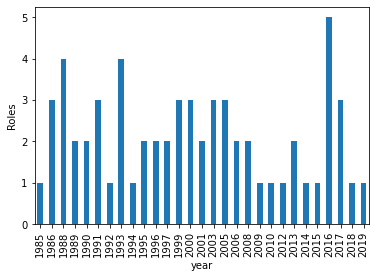

In [ ]:
kr_by_year.plot(kind='bar', ylabel='Roles')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [ ]:
kr_n_val = kr_df.groupby(kr_df.year)['n'].sum()
print(kr_n_val)

year
1985     1.0
1986    17.0
1988    14.0
1989     9.0
1990     8.0
1991     5.0
1992     4.0
1993    19.0
1994     1.0
1995     2.0
1996     2.0
1997     3.0
1999    85.0
2000     7.0
2001     2.0
2003    95.0
2005    39.0
2006     5.0
2008     2.0
2009    16.0
2010     1.0
2012     0.0
2013     3.0
2014     1.0
2015     1.0
2016    46.0
2017    12.0
2018     1.0
2019     0.0
Name: n, dtype: float64


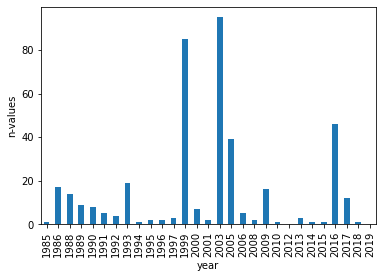

In [ ]:
kr_n_val.plot(kind='bar', ylabel='n-values')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

In [ ]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False) ]
print(hamlet_df)

                                          title  year
1931                                     Hamlet  2009
8214                                     Hamlet  1976
10364                             Hamlet A.D.D.  2014
17531                            Hamlet's Ghost  2015
17833                             Zombie Hamlet  2012
40045                               Hamlet (II)  2005
44571                               Hamlet (II)  2015
46344                                    Hamlet  1921
47248                    Hamlet liikemaailmassa  1987
50271                            Hamlet/Horatio  2017
51236                            Hamlet Unbound  2012
52408                 Hamlet the Vampire Slayer  2008
55525                    Hamlet in the Hamptons  2002
55639                                    Hamlet  2000
55951                               Fuck Hamlet  1996
66134                        Han, hun og Hamlet  1922
70547         Royal Shakespeare Company: Hamlet  2016
73869                       

In [ ]:
hamlet_decade = hamlet_df.groupby( (hamlet_df.year//10)*10 ).count()
del hamlet_decade['year']
# hamlet_decade.rename(columns={'title': 'movies'}, inplace=True)
print(hamlet_decade)

      title
year       
1910      4
1920      2
1930      1
1940      1
1950      1
1960      3
1970      4
1980      3
1990      6
2000     13
2010     19


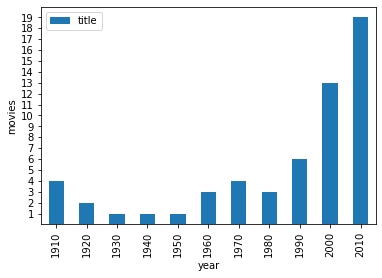

In [ ]:
import math
yint = range(min(hamlet_decade.title), math.ceil(max(hamlet_decade.title))+1)
hamlet_decade.plot(kind='bar', ylabel='movies', yticks=yint)
# hamlet_decade.plot(kind='bar', ylabel='movies')

### Section II - Q8: available leading roles

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [ ]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [ ]:
## (A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?
tmp1 = cast[(cast.type.str.contains('actor', case=False)) | 
            (cast.type.str.contains('actress', case=False)) ]
tmp2 = tmp1[(tmp1.year>=1960) & (tmp1.year<=1969) ]
tmp3 = tmp2[tmp2.n>=0]
print(tmp3)

                      title  year            name     type       character  \
26             Los tarantos  1963      'El Guisa'    actor         Bailaor   
28             Los tarantos  1963       'El Viti'    actor         Cantaor   
53             Los tarantos  1963        'Morita'    actor         Cantaor   
56             Los tarantos  1963     'Pucherete'    actor       Guitarist   
67             De zaak M.P.  1960   Frans 't Hoen    actor  Hollandse boer   
...                     ...   ...             ...      ...             ...   
3785857  Kan su gibi akacak  1969       ?lk? ?zen  actress            Elif   
3785877     Aci ile karisik  1969    G?zin ?zipek  actress         M?berra   
3785969      Kafkas kartali  1968    Leman ?zt?rk  actress         Tatyana   
3786005            Omringet  1960   Kari ?ksnevad  actress      Anne Aulie   
3786069                Line  1961  Olava ?verland  actress     A passenger   

            n  
26       25.0  
28       20.0  
53       18.0  

In [ ]:
# (B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?
tmp1 = cast[(cast.type.str.contains('actor', case=False)) | 
            (cast.type.str.contains('actress', case=False)) ]
tmp2 = tmp1[(tmp1.year>=2000) & (tmp1.year<=2009) ]
tmp3 = tmp2[tmp2.n>=0]
print(tmp3)

                                    title  year  \
27                            De la calle  2001   
39              Nothing Like the Holidays  2008   
41                       Subtle Seduction  2008   
42             The Godfather of Green Bay  2005   
47                       Rebecca's Window  2006   
...                                   ...   ...   
3786158  Niceland (Population. 1.000.002)  2004   
3786163                 Beowulf & Grendel  2005   
3786169  Niceland (Population. 1.000.002)  2004   
3786172  Niceland (Population. 1.000.002)  2004   
3786174                      U.S.S.S.S...  2003   

                                   name     type  \
27                      Luis 'El Plojo'    actor   
39              Johnny 'Koolout' Starks    actor   
41              Johnny 'Koolout' Starks    actor   
42              Johnny 'Koolout' Starks    actor   
47                Yradier 'Lito' Tejada    actor   
...                                 ...      ...   
3786158           Hugr?

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [ ]:
fo = cast[cast.name.str.contains('Frank Oz', case=False) ]
print(fo)

                                  title  year      name   type  \
1723598  An American Werewolf in London  1981  Frank Oz  actor   
1723599  An American Werewolf in London  1981  Frank Oz  actor   
1723600             Blues Brothers 2000  1998  Frank Oz  actor   
1723601                Follow That Bird  1985  Frank Oz  actor   
1723602                Follow That Bird  1985  Frank Oz  actor   
...                                 ...   ...       ...    ...   
1723657      The Muppets Take Manhattan  1984  Frank Oz  actor   
1723658      The Muppets Take Manhattan  1984  Frank Oz  actor   
1723659      The Muppets Take Manhattan  1984  Frank Oz  actor   
1723660                  Trading Places  1983  Frank Oz  actor   
1723661      Zathura: A Space Adventure  2005  Frank Oz  actor   

                              character     n  
1723598                     Mr. Collins  13.0  
1723599                      Miss Piggy  13.0  
1723600                          Warden   4.0  
1723601        

In [ ]:
# fo = fo_df.groupby(fo_df.title)['year'].count()
# tmp = fo.groupby(fo.title)['year'].transform('count')
# tmp = fo.groupby([fo.title, fo.year, fo.character])['character'].count()
# fo['num_roles'] = fo.groupby(["title"]).count()
# tmp.rename(columns={tmp.columns[-1]: 'roles'}, inplace=True)
# df['count'] = df.groupby(['col1', 'col2'])['col3'].transform('count')
# tmp.sort_values(ascending=True)
tmp = fo.groupby([fo.title, fo.year])['character'].count()
tmp = tmp[tmp>1]
print(tmp.sort_index(level=1))

title                                 year
The Muppet Movie                      1979    8
An American Werewolf in London        1981    2
The Great Muppet Caper                1981    6
The Dark Crystal                      1982    2
The Muppets Take Manhattan            1984    7
Follow That Bird                      1985    3
The Muppet Christmas Carol            1992    7
Muppet Treasure Island                1996    4
Muppets from Space                    1999    4
The Adventures of Elmo in Grouchland  1999    3
Name: character, dtype: int64


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [ ]:
tmp = fo.groupby([fo.character])['title'].count()
tmp = tmp[tmp>1]
print(tmp)

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: title, dtype: int64


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

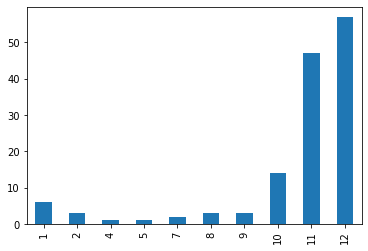

In [ ]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

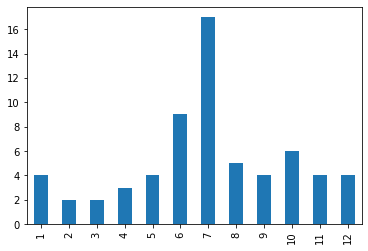

In [ ]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


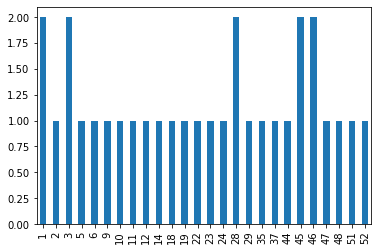

In [ ]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [ ]:
# merge/join cast and release_dates 
merged = pd.merge(release_dates, cast, on=["title", "year"])

In [ ]:
print(merged.tail())
print(merged.info())

                            title  year country       date  \
19579692  xXx: State of the Union  2005  Greece 2005-06-24   
19579693  xXx: State of the Union  2005  Greece 2005-06-24   
19579694  xXx: State of the Union  2005  Greece 2005-06-24   
19579695  xXx: State of the Union  2005  Greece 2005-06-24   
19579696  xXx: State of the Union  2005  Greece 2005-06-24   

                        name     type       character     n  
19579692    Deborah S. Smith  actress  Business Woman   NaN  
19579693       Gina St. John  actress  Field Reporter  28.0  
19579694  Paola (III) Torres  actress    DC Executive   NaN  
19579695      Samantha Tyler  actress   Corvette Girl  38.0  
19579696  Gay-Yee Westerhoff  actress  String Quartet   NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579697 entries, 0 to 19579696
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   title      object        
 1   year       int64         
 2   country    o

In [ ]:
tmp1  = merged[(merged.name.str.contains('Keanu Reeves')) ]
kr_df = tmp1[(tmp1.country=='USA') & (tmp1.n>=0) ]

In [ ]:
print(len(kr_df))
print( kr_df.sort_values(by=['date'], ascending=True) )

45
                                      title  year country       date  \
19447583                         Youngblood  1986     USA 1986-01-31   
12068736                       River's Edge  1986     USA 1987-05-08   
16617480                   The Night Before  1988     USA 1988-04-15   
11186594                   Permanent Record  1988     USA 1988-04-22   
1976880    Bill & Ted's Excellent Adventure  1989     USA 1989-02-17   
3535852                  Dangerous Liaisons  1988     USA 1989-02-24   
11020591                         Parenthood  1989     USA 1989-05-26   
6754656                 I Love You to Death  1990     USA 1990-04-06   
18289563                Tune in Tomorrow...  1990     USA 1990-11-02   
11392059                        Point Break  1991     USA 1991-07-12   
1976345          Bill & Ted's Bogus Journey  1991     USA 1991-07-19   
4185012                             Dracula  1992     USA 1992-11-13   
10013020             Much Ado About Nothing  1993     USA 199

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

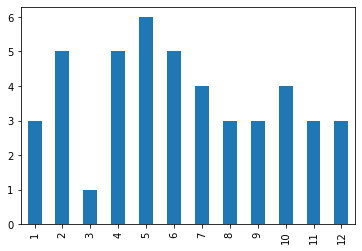

In [ ]:
kr_df.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [ ]:
im_df = merged[(merged.name.str.contains('Ian McKellen')) & (merged.country=='USA') ]
print(len(im_df))
print(im_df)

39
                                                      title  year country  \
1113657                                     Animal Crackers  2017     USA   
1236895                                           Apt Pupil  1998     USA   
1781019                                Beauty and the Beast  2017     USA   
1868467                                                Bent  1997     USA   
4127727                                              Doogal  2006     USA   
5084212                                        Flushed Away  2006     USA   
5695400                                   Gods and Monsters  1998     USA   
6804492                                    I'll Do Anything  1994     USA   
7325976                                        Jack & Sarah  1995     USA   
8365180                                    Last Action Hero  1993     USA   
9962486                                          Mr. Holmes  2015     USA   
11380482                                             Plenty  1985     USA

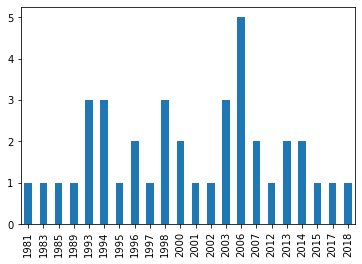

In [ ]:
im_df.date.dt.year.value_counts().sort_index().plot(kind='bar')